I want to answer the question of whether stocks in Kenya outperform bonds over a 10 year period. I will use the Safaricom stock since it is the most traded. For the treasury bond performance, I will use Average Yield Maturity, Coupon rates and total returns and Inflation-adjusted returns.


In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt

In [2]:
#Define the time period of analysis
start_date = dt.datetime(2014, 1, 1)
end_date = dt.datetime(2024, 1, 1)


In [4]:
#Upload files from storage
from google.colab import files
uploaded = files.upload()

Saving HistoricalPrices (1).csv to HistoricalPrices (1).csv
Saving Issues of Treasury Bonds.xlsx to Issues of Treasury Bonds.xlsx
Saving Treasury Bond Interest Payments Schedule.xlsx to Treasury Bond Interest Payments Schedule.xlsx
Saving Treasury Bonds Prospectuses.xlsx to Treasury Bonds Prospectuses.xlsx
Saving Treasury Bond Results.xlsx to Treasury Bond Results.xlsx


In [19]:
#load safaricom data
safcom_data = pd.read_csv('HistoricalPrices (1).csv')

In [20]:
#Print the first 5 rows
safcom_data.head()

,Date,Open,High,Low,Close,Volume
0,02/28/25,18.00,18.10,17.9,17.95,1734900
1,02/27/25,18.30,18.30,18.0,18.10,1103900
2,02/26/25,18.30,18.50,18.0,18.15,5424300
3,02/25/25,18.60,18.75,18.2,18.50,4531400
4,02/24/25,18.75,18.95,18.5,18.70,1740500


In [21]:
#Get the info about the data types in the columns
safcom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2786 non-null   object 
 1    Open    2786 non-null   float64
 2    High    2786 non-null   float64
 3    Low     2786 non-null   float64
 4    Close   2786 non-null   float64
 5    Volume  2786 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 130.7+ KB


In [26]:
#Convert the Date comlumn to datetime object
safcom_data['Date'] = pd.to_datetime(safcom_data['Date'], format = "%Y-%m-%d")


In [27]:
safcom_data

,Date,Open,High,Low,Close,Volume
0,2025-02-28,18.00,18.10,17.90,17.95,1734900
1,2025-02-27,18.30,18.30,18.00,18.10,1103900
2,2025-02-26,18.30,18.50,18.00,18.15,5424300
3,2025-02-25,18.60,18.75,18.20,18.50,4531400
4,2025-02-24,18.75,18.95,18.50,18.70,1740500
...,...,...,...,...,...,...
2781,2014-01-08,11.10,11.65,11.10,11.35,6687700
2782,2014-01-07,11.00,11.15,11.00,11.10,5567900
2783,2014-01-06,10.90,11.15,10.80,11.05,9518700
2784,2014-01-03,10.80,10.95,10.75,10.80,2712300


In [29]:
#Drop the 2025 data from the dataframe
safcom_data = safcom_data[safcom_data['Date'].dt.year < 2025]
safcom_data

,Date,Open,High,Low,Close,Volume
42,2024-12-31,17.15,17.35,17.00,17.05,1243600
43,2024-12-30,17.20,17.50,17.05,17.15,935100
44,2024-12-27,17.10,17.50,17.05,17.10,283900
45,2024-12-24,17.50,17.50,17.05,17.20,169800
46,2024-12-23,17.70,17.70,17.15,17.50,195000
...,...,...,...,...,...,...
2781,2014-01-08,11.10,11.65,11.10,11.35,6687700
2782,2014-01-07,11.00,11.15,11.00,11.10,5567900
2783,2014-01-06,10.90,11.15,10.80,11.05,9518700
2784,2014-01-03,10.80,10.95,10.75,10.80,2712300


In [37]:
#Group the stock prices by year
annual_prices = safcom_data.groupby(safcom_data['Date'].dt.year)[' Close'].agg(['first', 'last']).reset_index()

In [41]:
#Get the annual stock returns for the stock
annual_prices["return"] = (annual_prices['last'] - annual_prices['first']) / annual_prices['first'] * 100


In [43]:
#print the first 5 rows of the annual prices df
annual_prices


,Date,first,last,return
0,2014,14.05,10.75,-23.487544
1,2015,16.30,14.15,-13.190184
2,2016,19.15,16.35,-14.621410
3,2017,26.75,19.00,-28.971963
4,2018,22.20,26.75,20.495495
5,2019,31.50,22.25,-29.365079
6,2020,34.25,31.30,-8.613139
7,2021,37.95,34.25,-9.749671
8,2022,24.15,38.15,57.971014
9,2023,13.90,24.05,73.021583


In [44]:
#Read data into pandas
bond_data = pd.read_excel('Issues of Treasury Bonds.xlsx')



In [45]:
#Drop missing values
bond_data.dropna(inplace=True)

In [46]:
#Format issue date to the correct format
bond_data['Issue Date'] = pd.to_datetime(bond_data['Issue Date'], format='%d/%m/%Y')

In [47]:
# Filter for 10-year bonds (handle different formats of 'Tenor')
bond_data = bond_data[
    (bond_data['Tenor'].astype(str).str.contains("10", regex=False)) &  # Tenor includes '10'
    (bond_data['Issue Date'].dt.year >= 2014) &  # From 2014
    (bond_data['Issue Date'].dt.year <= 2024)    # To 2024
]

In [48]:
#Choose the columns needed
bond_data = bond_data[['Issue Date','Redemption Yield']]

In [49]:
#Extract year from Issue Date
bond_data = bond_data.copy()
bond_data['Year'] = bond_data['Issue Date'].dt.year


In [50]:
#Getting the annualized bond yield
annualized_yield = bond_data.groupby('Year')['Redemption Yield'].mean().reset_index()

In [51]:
#Creating a column named annualized_yield
annualized_yield.rename(columns = {'Redemption Yield': 'Annualized Yield'}, inplace=True)

In [52]:
annualized_yield

,Year,Annualized Yield
0,2014,12.238000
1,2015,12.836500
2,2016,14.957000
3,2017,12.895875
4,2018,12.664200
5,2019,12.163000
6,2020,11.941500
7,2021,12.407000
8,2022,13.450600
9,2023,15.515450


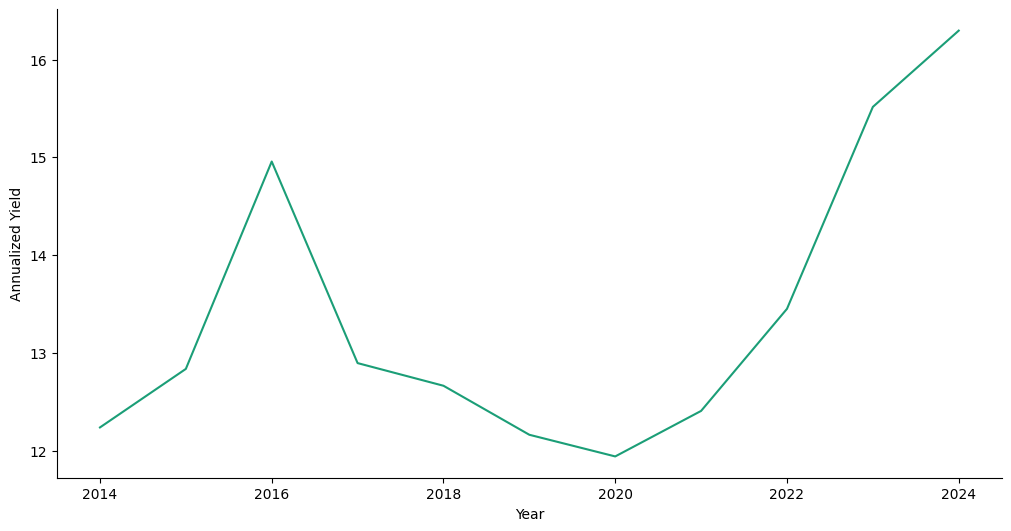

In [56]:
# @title Year vs Annualized Yield

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Annualized Yield']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = annualized_yield.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Annualized Yield')

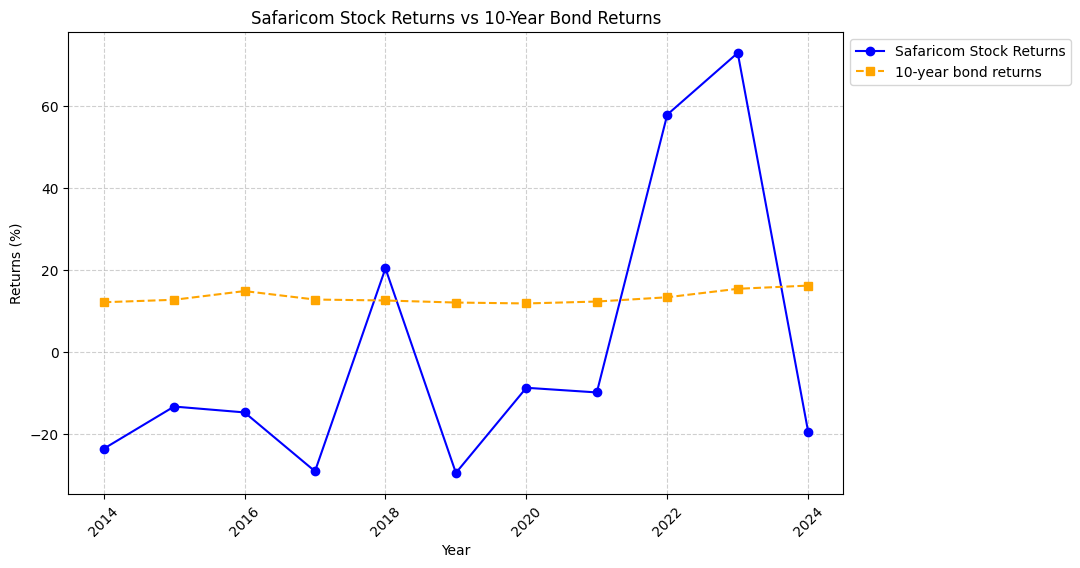

In [57]:
#Visualize the returns of safaricom stock against 10 year bond returns
plt.figure(figsize=(10, 6))

# Plot Safaricom stock returns
plt.plot(annual_prices['Date'], annual_prices['return'], label='Safaricom Stock Returns', color='blue', linestyle='-', marker='o')

# Plot 10-year bond returns
plt.plot(annualized_yield['Year'], annualized_yield['Annualized Yield'], label='10-year bond returns', color='orange', linestyle='--', marker='s')

# Formatting
plt.xlabel('Year')
plt.ylabel('Returns (%)')
plt.title('Safaricom Stock Returns vs 10-Year Bond Returns')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # Move legend outside
plt.grid(True, linestyle="--", alpha=0.6)  # Add a grid
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()

Conclusion from the Chart:
Bond Stability vs. Stock Volatility

The 10-year bond returns remain relatively stable and positive over the period, showing minimal fluctuations.
Safaricom stock returns, on the other hand, exhibit significant volatility, with years of high returns followed by sharp declines.
Risk-Return Tradeoff

While Safaricom stock has higher peaks, it also experiences more extreme drops, indicating a higher-risk, higher-reward investment.
The bond market, despite offering lower peaks, provides consistent and relatively safer returns over the years.
Underperformance of Stocks Compared to Bonds

In most years, the stock returns fall below bond returns, suggesting that investors seeking stability would have been better off investing in bonds.
However, in certain years (e.g., 2021-2023), Safaricom stock significantly outperformed bonds, showing its potential for high gains.
Key Takeaways for Investors:
For risk-averse investors: The 10-year bond would be a better choice due to consistent and stable returns.
For risk-tolerant investors: Safaricom stock presents opportunities for higher returns but requires timing and risk management due to its volatility.
Diversification Strategy: A combination of bonds for stability and stocks for growth potential might be a balanced approach to manage risk while capturing potential gains.